In [1]:
library(data.table)

In [2]:
library(ggplot2)

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
options(scipen=999)

# Registered user event lengths

In [5]:
registered_user_mwsessions_results <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/registered_user_session_data.tsv", header=TRUE, sep="\t"))

In [24]:
summary(registered_user_mwsessions_results)

      user             start                     end                
 182345 :   8951   Min.   :20121029170300   Min.   :20121029173300  
 161984 :   6452   1st Qu.:20140725074900   1st Qu.:20140725080800  
 131279 :   5545   Median :20150817073900   Median :20150817080500  
 11501  :   5315   Mean   :20150922578000   Mean   :20150922864600  
 150965 :   5243   3rd Qu.:20160705114100   3rd Qu.:20160705120100  
 117788 :   5025   Max.   :20170502122500   Max.   :20170502122800  
 (Other):4803382                                                    
     index            events          start_time                 
 Min.   :   0.0   Min.   :      1   Min.   :2012-10-29 17:03:21  
 1st Qu.:  42.0   1st Qu.:      1   1st Qu.:2014-07-25 07:49:32  
 Median : 192.0   Median :      1   Median :2015-08-17 07:39:10  
 Mean   : 464.6   Mean   :     82   Mean   :2015-07-05 07:41:28  
 3rd Qu.: 590.0   3rd Qu.:      4   3rd Qu.:2016-07-05 11:41:43  
 Max.   :8950.0   Max.   :5652125   Max.   :2017-05-

In [6]:
registered_user_mwsessions_results$start_time <- as.POSIXct(as.character(registered_user_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [7]:
registered_user_mwsessions_results$end_time <- as.POSIXct(as.character(registered_user_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [10]:
registered_user_mwsessions_results$session_time_difference <- as.numeric(registered_user_mwsessions_results$end_time - registered_user_mwsessions_results$start_time)

In [11]:
registered_user_mwsessions_results$session_log_time_difference <- log10(registered_user_mwsessions_results$session_time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

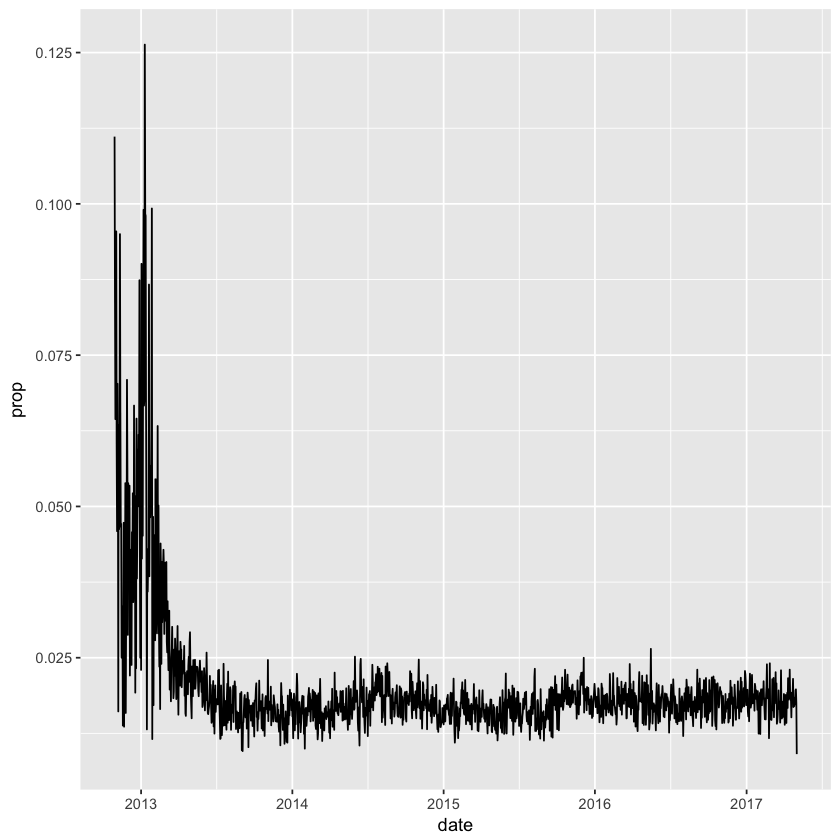

In [35]:
ggplot(registered_user_mwsessions_results[,
list(n=length(session_time_difference), prop=mean(session_time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”

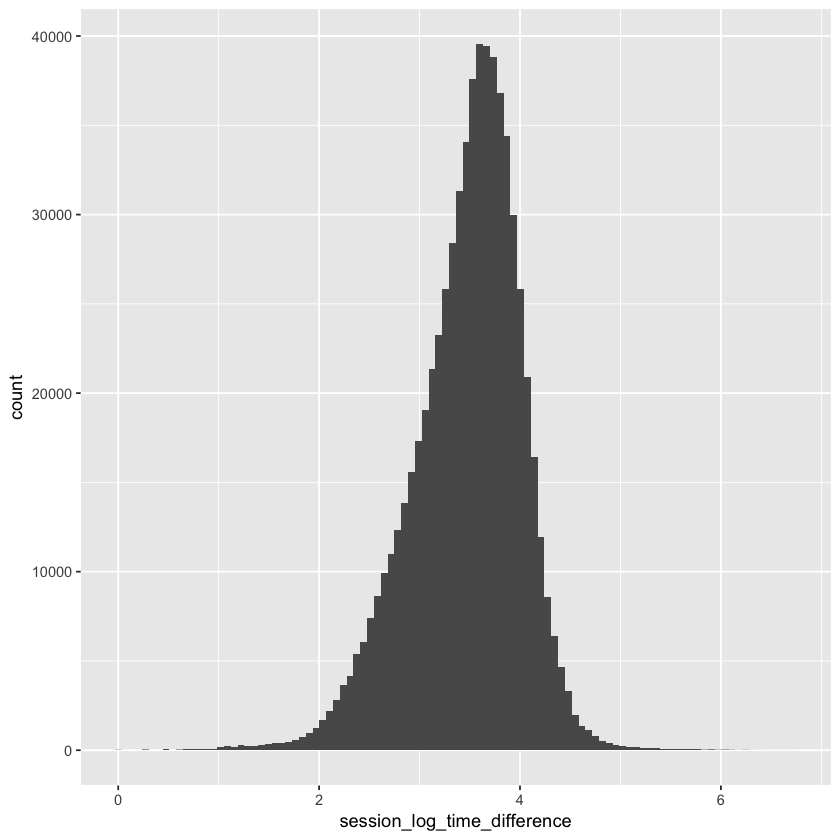

In [28]:
ggplot(registered_user_mwsessions_results[registered_user_mwsessions_results$events >= 10,],
       aes(x=session_log_time_difference)) +
geom_histogram(bins=100) #+ 
#scale_x_continuous(breaks=log10(c(2,10,60)))

# Anon event lengths

In [49]:
anon_mwsessions_results <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/registered_user_session_data.tsv", header=TRUE, sep="\t"))

In [50]:
anon_mwsessions_results$start_time <- as.POSIXct(as.character(anon_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [51]:
anon_mwsessions_results$end_time <- as.POSIXct(as.character(anon_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [52]:
anon_mwsessions_results$session_time_difference <- as.numeric(anon_mwsessions_results$end_time - anon_mwsessions_results$start_time)

In [58]:
anon_mwsessions_results$session_log_time_difference <- log10(anon_mwsessions_results$session_time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [59]:
summary(anon_mwsessions_results)

      user             start                     end                
 182345 :   8951   Min.   :20121029170300   Min.   :20121029173300  
 161984 :   6452   1st Qu.:20140725074900   1st Qu.:20140725080800  
 131279 :   5545   Median :20150817073900   Median :20150817080500  
 11501  :   5315   Mean   :20150922578000   Mean   :20150922864600  
 150965 :   5243   3rd Qu.:20160705114100   3rd Qu.:20160705120100  
 117788 :   5025   Max.   :20170502122500   Max.   :20170502122800  
 (Other):4803382                                                    
     index            events          start_time                 
 Min.   :   0.0   Min.   :      1   Min.   :2012-10-29 17:03:21  
 1st Qu.:  42.0   1st Qu.:      1   1st Qu.:2014-07-25 07:49:32  
 Median : 192.0   Median :      1   Median :2015-08-17 07:39:10  
 Mean   : 464.6   Mean   :     82   Mean   :2015-07-05 07:41:28  
 3rd Qu.: 590.0   3rd Qu.:      4   3rd Qu.:2016-07-05 11:41:43  
 Max.   :8950.0   Max.   :5652125   Max.   :2017-05-

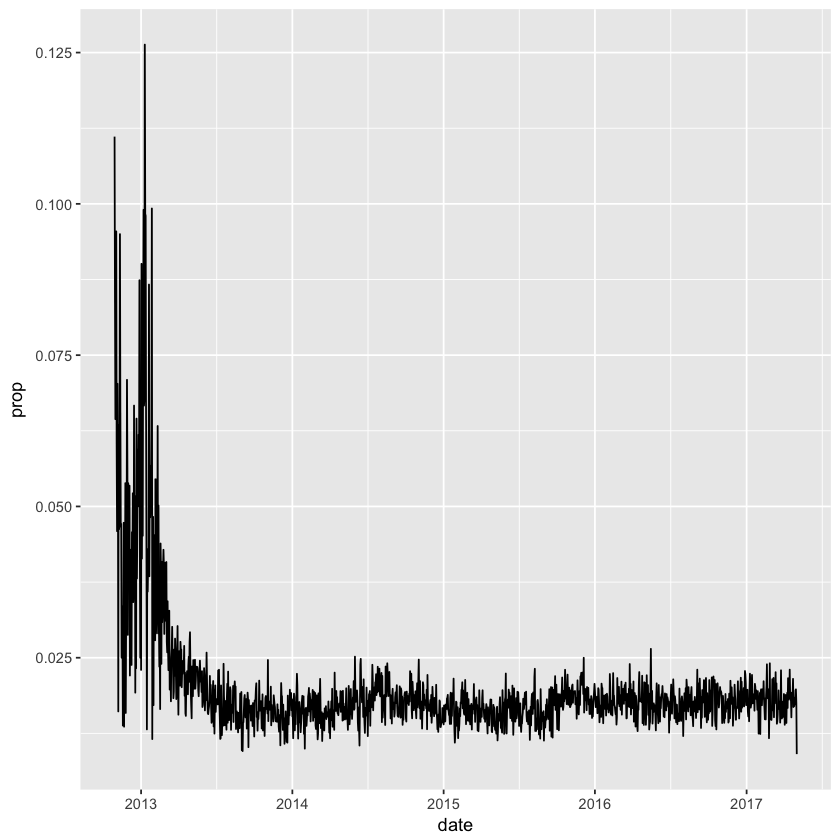

In [60]:
ggplot(anon_mwsessions_results[,
list(n=length(session_time_difference), prop=mean(session_time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”

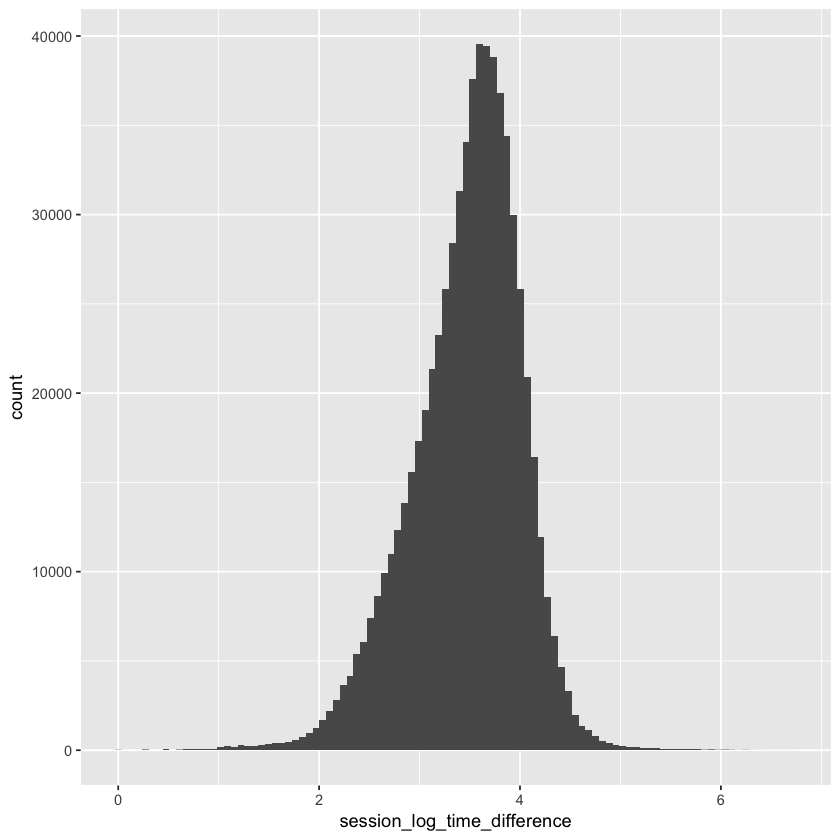

In [61]:
ggplot(anon_mwsessions_results[anon_mwsessions_results$events >= 10,],
       aes(x=session_log_time_difference)) +
geom_histogram(bins=100) #+ 
#scale_x_continuous(breaks=log10(c(2,10,60)))

# Human event lengths

In [71]:
human_mwsessions_results <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/human_session_data.tsv", header=TRUE, sep="\t"))

In [78]:
human_mwsessions_results$start_time <- as.POSIXct(as.character(human_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [79]:
human_mwsessions_results$end_time <- as.POSIXct(as.character(human_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [80]:
human_mwsessions_results$session_time_difference <- as.numeric(human_mwsessions_results$end_time - human_mwsessions_results$start_time)

In [81]:
human_mwsessions_results$session_log_time_difference <- log10(human_mwsessions_results$session_time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

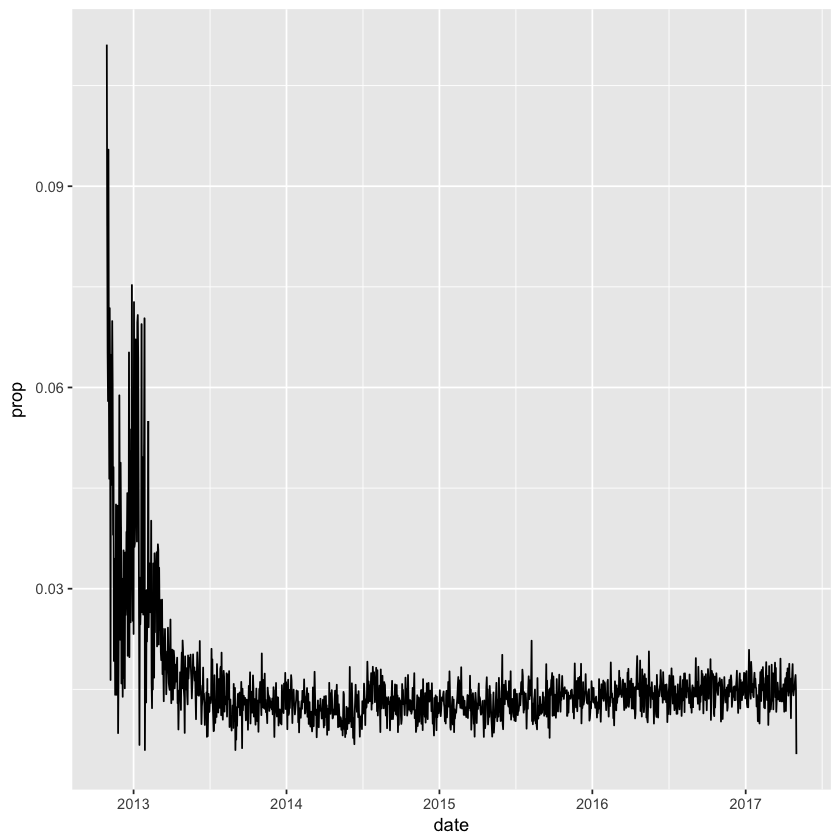

In [82]:
ggplot(human_mwsessions_results[,
list(n=length(session_time_difference), prop=mean(session_time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

Warning message:
“Removed 8 rows containing non-finite values (stat_bin).”

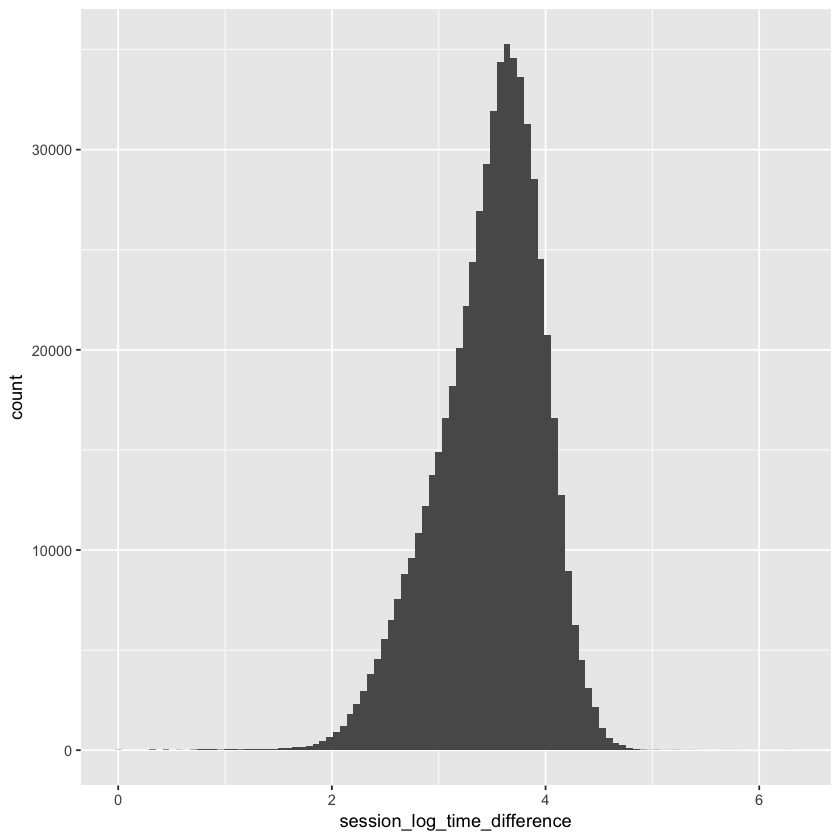

In [83]:
ggplot(human_mwsessions_results[human_mwsessions_results$events >= 10,],
       aes(x=session_log_time_difference)) +
geom_histogram(bins=100) #+ 
#scale_x_continuous(breaks=log10(c(2,10,60)))

# All property event lengths

In [62]:
all_property_mwsessions_results <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/all_property_session_data.tsv", header=TRUE, sep="\t"))

In [63]:
all_property_mwsessions_results$start_time <- as.POSIXct(as.character(all_property_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [64]:
all_property_mwsessions_results$end_time <- as.POSIXct(as.character(all_property_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [65]:
all_property_mwsessions_results$session_time_difference <- as.numeric(all_property_mwsessions_results$end_time - all_property_mwsessions_results$start_time)

In [66]:
all_property_mwsessions_results$session_log_time_difference <- log10(all_property_mwsessions_results$session_time_difference + 1)

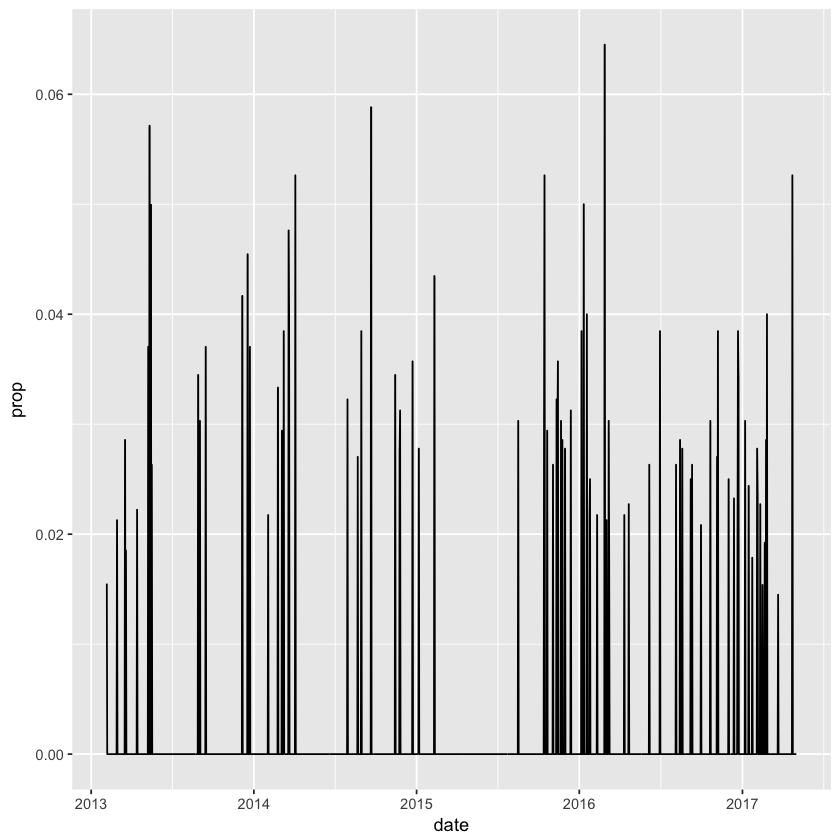

In [67]:
ggplot(all_property_mwsessions_results[,
list(n=length(session_time_difference), prop=mean(session_time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

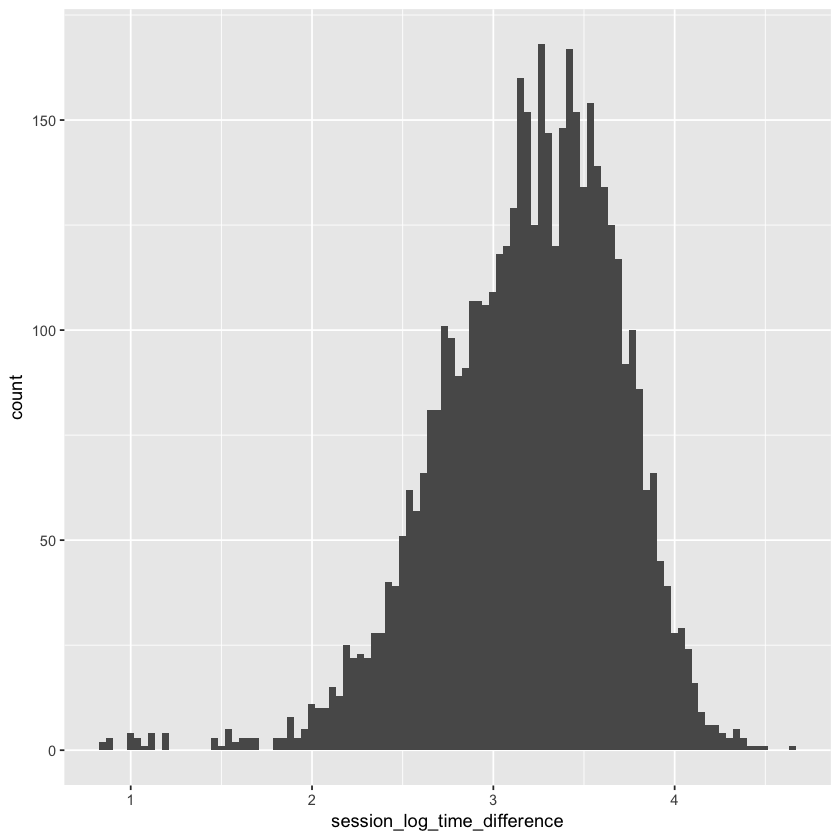

In [69]:
ggplot(all_property_mwsessions_results[all_property_mwsessions_results$events >= 10,],
       aes(x=session_log_time_difference)) +
geom_histogram(bins=100) #+ 
#scale_x_continuous(breaks=log10(c(2,10,60)))

# All human property event lengths

In [84]:
human_property_mwsessions_results <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/human_property_session_data.tsv", header=TRUE, sep="\t"))

In [85]:
human_property_mwsessions_results$start_time <- as.POSIXct(as.character(human_property_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [86]:
human_property_mwsessions_results$end_time <- as.POSIXct(as.character(human_property_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [87]:
human_property_mwsessions_results$session_time_difference <- as.numeric(human_property_mwsessions_results$end_time - human_property_mwsessions_results$start_time)

In [88]:
human_property_mwsessions_results$session_log_time_difference <- log10(human_property_mwsessions_results$session_time_difference + 1)

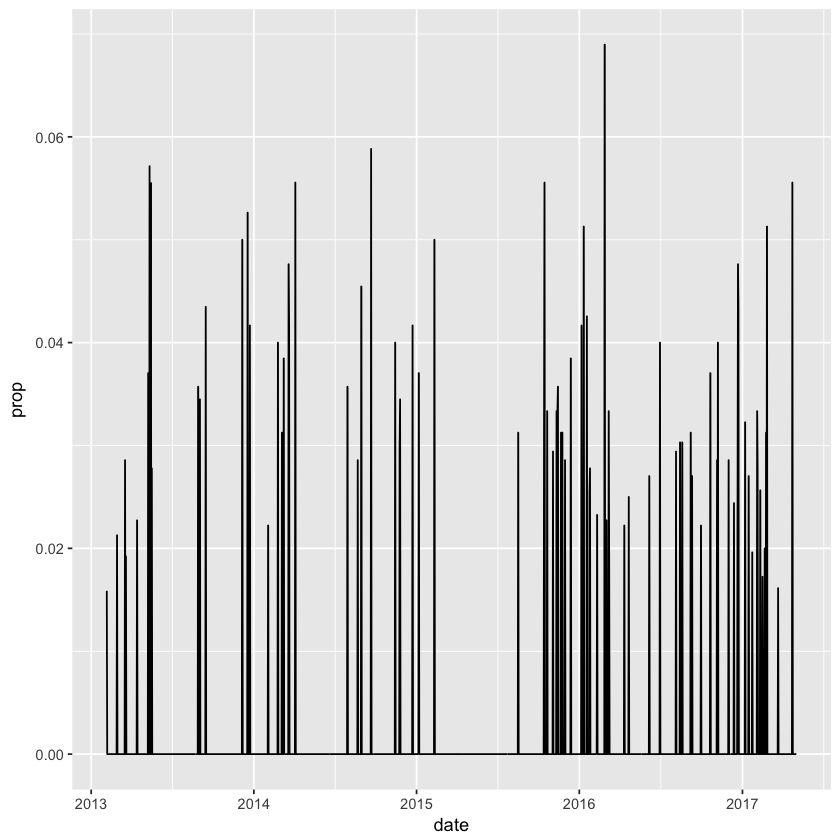

In [89]:
ggplot(human_property_mwsessions_results[,
list(n=length(session_time_difference), prop=mean(session_time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

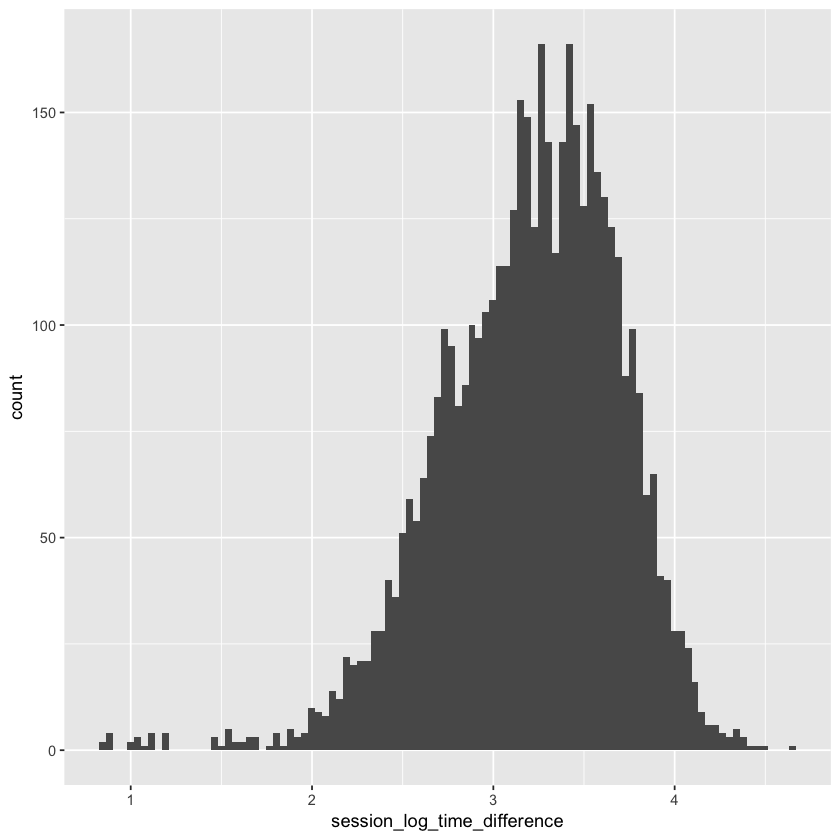

In [90]:
ggplot(human_property_mwsessions_results[human_property_mwsessions_results$events >= 10,],
       aes(x=session_log_time_difference)) +
geom_histogram(bins=100) #+ 
#scale_x_continuous(breaks=log10(c(2,10,60)))